### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,name,sex,age,SibSp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   sex          418 non-null    object 
 4   age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   parch        418 non-null    int64  
 7   ticket       418 non-null    object 
 8   fare         417 non-null    float64
 9   cabin        91 non-null     object 
 10  embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
survived = train['Survived']

df = pd.concat([train.drop('Survived',axis=1),test])

df.head()

,PassengerId,Pclass,name,sex,age,SibSp,parch,ticket,fare,cabin,embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId       0
Pclass            0
name              0
sex               0
age             263
SibSp             0
parch             0
ticket            0
fare              1
cabin          1014
embarked          2
dtype: int64

In [7]:
df.describe()

,PassengerId,Pclass,age,SibSp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


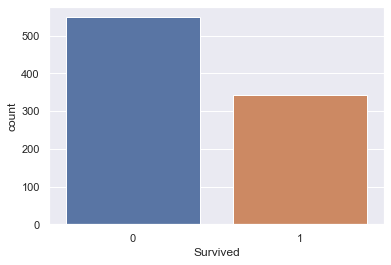

In [8]:
sns.countplot(x='Survived',data=train)

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
549/891

0.6161616161616161

## Null Accuracy

In [11]:
test['Survived'] = 0

In [12]:
test[['PassengerId','Survived']].to_csv('no_survivors.csv',index=False)

### Why Null Accuracy? 0.62679

# Null Accuracy is the baseline accuracy that should be exceeded by any model.

# DMAIC 

### Define


### Measure


### Analyse


### Improve


### Control

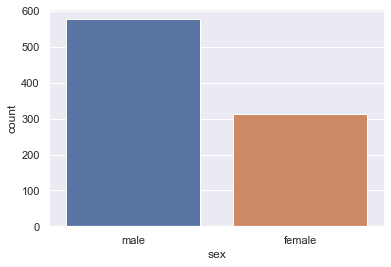

In [13]:
sns.countplot(x='sex',data=train);

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'name', 'sex', 'age', 'SibSp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


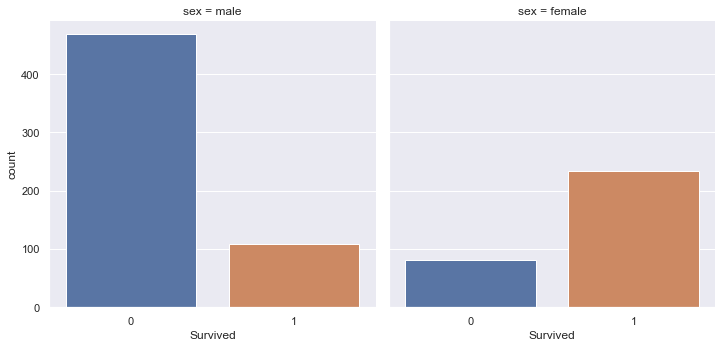

In [15]:
sns.factorplot(x='Survived',col='sex',kind='count',data=train);

## Observations from the above factorplot

#### 1. Number of male passengers is larger than number of female passengers


#### 2. Survival rate of Female passengers is much more than survival rate of male passengers

In [16]:
train.groupby('sex').Survived.sum()

sex
female    233
male      109
Name: Survived, dtype: int64

In [17]:
train['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [18]:
print('Female Survival Rate : ',233/314*100,'%')
print('Male Survival Rate : ',109/577*100,'%')

Female Survival Rate :  74.20382165605095 %
Male Survival Rate :  18.890814558058924 %


In [19]:
test['Survived'] = test.sex == 'female'
test['Survived'] = test['Survived'].apply(lambda x: int(x))

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   sex          418 non-null    object 
 4   age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   parch        418 non-null    int64  
 7   ticket       418 non-null    object 
 8   fare         417 non-null    float64
 9   cabin        91 non-null     object 
 10  embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [21]:
test[['PassengerId','Survived']].to_csv('female_survivors.csv',index=False)

In [27]:
more female_survivors.csv

In [25]:
fs = pd.read_csv('female_survivors.csv')
fs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
